# Cálculo del valor de decisión óptimo para el caso de una regla de decisión ML en una observación continua

In [1]:
#---------------------------------------------------------------------------------
# Project    : Tarea N°6
# Authors    : Mugni Juan Mauricio
# Affiliation: UNC
# E-mail     : mauricio.mugni@mi.unc.edu.ar
#---------------------------------------------------------------------------------

## Consigna

Considere el siguiente problema de prueba de hipótesis entre dos hipótesis igualmente probables. Bajo la hipótesis $H=0$, la señal observable $Y$ es igual $\alpha + Z$ donde $Z$ es una variable aleatoria con la siguiente distribución laplaciana:
$$f_z(z)=\frac{1}{2}e^{-|z-\mu|}$$
donde $\mu$ es la media de la variable $Z$.
Bajo la hipótesis $H = 1$, $Y$ viene dada por $-a+Z$. Vamos a suponer que $a$ es positivo.
- Realice un porgrama en una Jupyter Notebook que dibuje las funciones de densidad de probabilidad:
  $$f_{Y|H}(y|0)$$
  $$f_{Y|H}(y|1)$$
- Determine cualitativamente el nivel de decisión óptimo. Bajo que reglas de decisión es óptimo?
- Determine cuantitativamente el nivel de decisión óptimo.
- Determine cuantitativamente la probabilidad de error $P_e$

## Resolución

### Funciones Densidad de Probabilidad

Se dice Funcion Densidad de Probabilidad porque $y$ es una variable aleatoria continua.

Para graficar la función densidad de probabilidad para cada una de las hipotesís, primero importamos las librerías:

In [53]:
import random
import numpy as np
import matplotlib.pyplot as plt

Definimos la variable a observar, y su rango:

In [75]:
divisiones = 100**2
y = np.linspace(-10,10,divisiones)

Definimos el parametro donde estaran centradas las curvas, representa la media de cada una.

In [81]:
a = 2

Una de las curvas tendra media de $-a$ y la otra de $a$

Incializo las listas para guardar los valores de las funciones densidad de probabilidad.

In [82]:
Fz1 = np.zeros_like(y) #Función Densidad de Probabilidad
Fz2 = np.zeros_like(y) #Función Densidad de Probabilidad

Realizo la simulación:

In [83]:
for i in range(len(y)):
 Fz1[i] = 1/2 * np.e**(-np.abs(y[i] + a))
 Fz2[i] = 1/2 * np.e**(-np.abs(y[i] - a))

Se gráfican las curvas solicitadas:

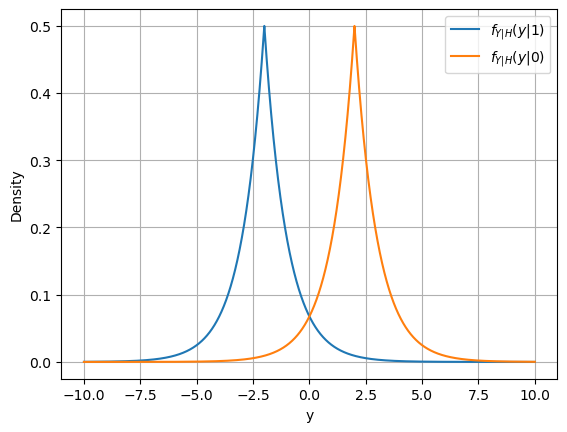

In [84]:
# Plot the results
plt.plot(y, Fz1[:len(y)], label="$f_{Y|H}(y|1)$")
plt.plot(y, Fz2[:len(y)], label="$f_{Y|H}(y|0)$")
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

### Análisis cualitativo para la determinación del nivel de decisión

Podemos determinar el siguiente criterio de decisión, si es mayor a cero, se esta en presencia de la función densidad de probabilidad 
$f_{Y|H}(y|0)$. En cambio, si es menor, $f_{Y|H}(y|1)$

Cuando $P_H(0)=P_H(1)=0$, el umbral $\eta$ es uno y la prueba MAP se convierte en una prueba ML binaria. Esto ya que la probabilidad de la fuente es equiprobable.

Es el punto donde las probabilidades de $H=0$ y $H=1$ son iguales.

### Análisis cuantitativo para la determinación del nivel de decisión

A partir de la definición de MAP para una prueba de Hipotesís Binaria:
$$\frac{f_{Y|1}(y|1)P_H(1)}{f_Y(y)}\lesseqgtr\frac{f_{Y|0}(y|0)P_H(0)}{f_Y(y)}$$
$$f_{Y|1}(y|1)P_H(1)\lesseqgtr f_{Y|0}(y|0)P_H(0)$$
Como $P_H(1)=P_H(0)$
$$f_{Y|1}(y|1) \lesseqgtr f_{Y|0}(y|0)$$
$$\frac{1}{2}e^{-|z+a|} \lesseqgtr \frac{1}{2}e^{-|z-a|}$$
$$-|z+a| \lesseqgtr -|z-a|$$
$$|z+a| \lesseqgtr |z-a|$$
Operamos de la siguiente manera:
$$\frac{|z+a|}{|z+a|} \lesseqgtr \frac{|z-a|}{|z+a|}$$
Como el denominador debe ser distinto de $0$:
$$z+a\neq 0$$
Entonces:
$$z \neq -a$$
Aplicando la siguiente propiedad $\frac{|a|}{|b|} = |\frac{a}{b}|$ a la expresión anterior, obtenemos:
$$ 1 \lesseqgtr \frac{|z-a|}{|z+a|}$$
Tenemos dos casos:
- $$\frac{z-a}{z+a} = 1 \Rightarrow z = 0$$
- $$\frac{z-a}{z+a} = -1 \Rightarrow Sin Solución$$
Se resuelve cada caso aplicando propiedad distributiva y despejando el valor de $z$.

Como podemos ver, se ha llegado al mismo criterio de decisión que de manera cualitativa.

### Probabilidad de error $P_e$

Para calcular la probabilidad de error total $P_e$, primero calculamos el error de que ocurra $H=0$ si se detecta $H=1$, es decir, calculamos el área bajo la curva de la función densidad de probabilidad de $H=0$ para cuando es menor al nivel de decisión que se determino con anterioridad.

#### Probabilidad de error de $H=0$

$$P_e(0)=P_r\{y<0|H=0\}=\int_{-\infty}^{0} f_{Y|H}(y|0) \,dy $$
$$ = \int_{-\infty}^{0} \frac{1}{2}e^{-|y-a|} \,dy $$
Los límites de la integral me definen que parte del valor absoluto tomar:
$$ = \int_{-\infty}^{0} \frac{1}{2}e^{-(-(y-a))} \,dy $$
$$ = \int_{-\infty}^{0} \frac{1}{2}e^{y}e^{-a} \,dy $$
$$ = \frac{e^{-a}}{2} \int_{-\infty}^{0} e^{y} \,dy $$
$$ = \frac{e^{-a}}{2} ( e^0 - \lim_{y\to - \infty} e^y )$$
$$ = \frac{e^{-a}}{2} ( 1 - 0 )$$
Entonces:
$$P_e(0)= \frac{e^{-a}}{2}$$

#### Probabilidad de error de $H=1$

$$P_e(1)=P_r\{y>0|H=1\}=\int_{-\infty}^{0} f_{Y|H}(y|1) \,dy $$
$$ = \int_{-\infty}^{0} \frac{1}{2}e^{-|y-a|} \,dy $$
Los límites de la integral me definen que parte del valor absoluto tomar:
$$ = \int_{-\infty}^{0} \frac{1}{2}e^{-(-(y-a))} \,dy $$
$$ = \int_{-\infty}^{0} \frac{1}{2}e^{y}e^{-a} \,dy $$
$$ = \frac{e^{-a}}{2} \int_{-\infty}^{0} e^{y} \,dy $$
$$ = \frac{e^{-a}}{2} ( e^0 - \lim_{y\to - \infty} e^y )$$
$$ = \frac{e^{-a}}{2} ( 1 - 0 )$$
Entonces:
$$P_e(1)= \frac{e^{-a}}{2}$$

#### Probabilidad de error total

La probabilidad de error total va a ser la probabilidad de cada error por la probabilidad de cada una de las fuentes:
$$P_e=P_e(1)P_H(1)+P_e(0)P_H(0)$$
$$P_e = \frac{e^{-a}}{2}0.5 + \frac{e^{-a}}{2}0.5 $$
$$P_e = \frac{e^{-a}}{2}$$
Notar que el valor de $0.5$ es obtenido a partir del gráfico realizado, donde la probabilidad máxima de cada hipotesís es $0.5$